# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [1]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2023-02-17 13:32:57--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat.2’

test.dat.2          100%[===================>]   2.78K  --.-KB/s    in 0s      

2023-02-17 13:32:58 (468 MB/s) - ‘test.dat.2’ saved [2844/2844]

--2023-02-17 13:32:58--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat.2’

train.dat.2         100%[===================>]  10.98K  --.-KB/s    in 0.02s   

2023-02-17 13:32:58 (474 KB/s) - ‘train.dat.2’ saved [11244/11244]



In [2]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [3]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
#   the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    #TODO: Return dot product of array 1 and array 2
    sum_array = []
    for w, x in zip(array1, array2):
        sum_array.append(w * x)
    return sum(sum_array) 


def sigmoid(x):
    #TODO: Return outpout of sigmoid function on x
    return 1 / (1 + math.exp(-x))

# The output of the model, which for the perceptron is 
# the sigmoid function applied to the dot product of 
# the instance and the weights
def output(weight, instance):
    #TODO: return the output of the model 
    return sigmoid(dot_product(weight, instance))

# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    if sigmoid(dot_product(weights, instance)) >= 0.5:
        return 1
    return 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    # You do not to write code like this, but get used to it
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
#       lr (learning rate) 
#       epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):

    #TODO: name this step
    # This step is about weights initialization
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            #TODO: name these steps
            in_value = dot_product(weights, instance)
            output = sigmoid(in_value)
            error = instance[-1] - output
            #TODO: name these steps
            for i in range(0, len(weights)):
                weights[i] += lr * error * output * (1-output) * instance[i]

    return weights

## Run it

In [4]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 5
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)




#### Answer


If we use
```
output = predict(weights, instance)
error = instance[-1] - output
```

The output of `predict(weights, instance)` is discrete (either 0 or 1),
so for the output either 0 or 1,

the weight update: `weights[i] += lr * error * output * (1-output) * instance[i]` 

always returns `zero` 

### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [10]:
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]

In [11]:
for tpc in tr_percent:
    l = int(len(instances_tr)*tpc/100)
    inst_pc = instances_tr[0:l]
    for epc in num_epochs:
        for slr in lr:
            weights = train_perceptron(inst_pc, slr, epc)
            accuracy = get_accuracy(weights, instances_te)
            print(f"#tr: {len(inst_pc):3}, epochs: {epc:3}, learning rate: {slr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
            
        

#tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:   5, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:   5, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  10, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 68.0
#tr:  20, epochs

In [12]:
# instances_tr = read_data("train.dat")
# instances_te = read_data("test.dat")
# tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
# num_epochs = [5, 10, 20, 50, 100]     # number of epochs
# lr_array = [0.005, 0.01, 0.05]        # learning rate

# for lr in lr_array:
#   for tr_size in tr_percent:
#     for epochs in num_epochs:
#       size =  round(len(instances_tr)*tr_size/100)
#       pre_instances = instances_tr[0:size]
#       weights = train_perceptron(pre_instances, lr, epochs)
#       accuracy = get_accuracy(weights, instances_te)
#     print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
#             f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



### Solution - 3A Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
Generally, having more training data is always a better way to get accuracies. Instead, a smaple unbaised distribution from the original dataset with careful hyperparameter tuning could also provide competitive results than training on whole dataset. From the below code we can observe that 
config: ``` #tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0 ```
has give equal accuracies with just 75% of the original dataset.

In [13]:
for tpc in tr_percent:
    l = int(len(instances_tr)*tpc/100)
    inst_pc = instances_tr[0:l]
    for epc in num_epochs:
        for slr in lr:
            weights = train_perceptron(inst_pc, slr, epc)
            accuracy = get_accuracy(weights, instances_te)
            if accuracy>=80:
                print(f"#tr: {len(inst_pc):3}, epochs: {epc:3}, learning rate: {slr:.3f}; "
                      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")
            

#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs:  50, learning rate: 0.050; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 80.0


In [15]:
data_pc = []
accuracy_pc = []
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [100]              # number of epochs
lr = [0.01]

for tpc in tr_percent:
    l = int(len(instances_tr)*tpc/100)
    inst_pc = instances_tr[0:l]
    for epc in num_epochs:
        for slr in lr:
            weights = train_perceptron(inst_pc, slr, epc)
            accuracy = get_accuracy(weights, instances_te)
            data_pc.append(tpc)
            accuracy_pc.append(accuracy)
            print(f"#tr: {len(inst_pc):3}, epochs: {epc:3}, learning rate: {slr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr:  20, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr:  40, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 78.0
#tr: 300, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0
#tr: 400, epochs: 100, learning rate: 0.010; Accuracy (test, 100 instances): 80.0


In [18]:
import matplotlib.pyplot as plt


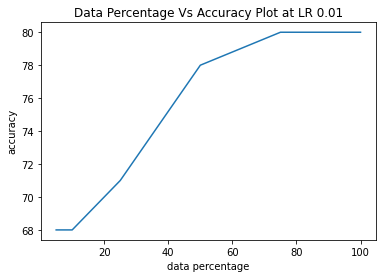

In [21]:
plt.plot(data_pc, accuracy_pc)
plt.title("Data Percentage Vs Accuracy Plot at LR 0.01")
  
# Adding the labels
plt.ylabel("accuracy")
plt.xlabel("data percentage")
plt.show()

In [22]:
data_pc = []
accuracy_pc = []
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [100]              # number of epochs
lr = [0.05]

for tpc in tr_percent:
    l = int(len(instances_tr)*tpc/100)
    inst_pc = instances_tr[0:l]
    for epc in num_epochs:
        for slr in lr:
            weights = train_perceptron(inst_pc, slr, epc)
            accuracy = get_accuracy(weights, instances_te)
            data_pc.append(tpc)
            accuracy_pc.append(accuracy)
            print(f"#tr: {len(inst_pc):3}, epochs: {epc:3}, learning rate: {slr:.3f}; "
                  f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr:  20, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 64.0
#tr:  40, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 69.0
#tr: 100, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 200, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 76.0
#tr: 300, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 77.0
#tr: 400, epochs: 100, learning rate: 0.050; Accuracy (test, 100 instances): 80.0


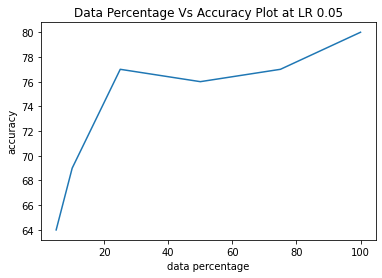

In [24]:
plt.plot(data_pc, accuracy_pc)
plt.title("Data Percentage Vs Accuracy Plot at LR 0.05")
  
# Adding the labels
plt.ylabel("accuracy")
plt.xlabel("data percentage")
plt.show()

Above graphs are plotted for data percentages with different learning rates (0.01, 0.05). In the second graph with higher LR the accuracy is not increasing despite the increment in dataset. We can state that choosing hyperparamters would play a pivotal role in getting accuracies even with small dataset.

#### Solution - 3B How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```

Despite have the more training data, learning rate for the second one is too small. If the learning rate is too small then your neural network will slowly converge towards the error minimum increasing the amount of time needed to train your model.

#### Solution - 3C Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?

Yes, there is always a chance to get accuracies higher than 80.0 with careful hyperparamter tuning and adding more layers/epochs.

#### Solution - 3D Is it always worth training for more epochs (while keeping all other hyperparameters fixed)

No, training for more epochs while freezing the hyperparamters results in overfitting, This leads to drop in accuracy on test dataset